In [1]:
import pandas as pd
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Loading Mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Checking for the first image

In [3]:
train_images.shape

(50000, 32, 32, 3)

[7]


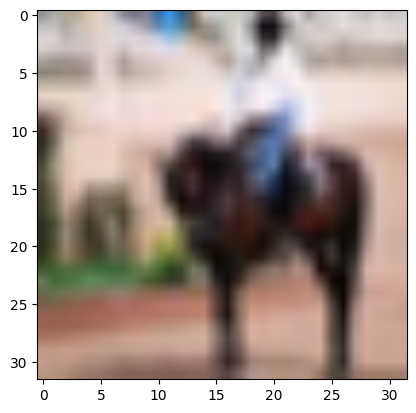

In [4]:
plt.imshow(train_images[11],interpolation='bilinear')
print(train_labels[11])
plt.show()

# Normalizing pictures

In [5]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [6]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels,num_classes)
test_labels = to_categorical(test_labels,num_classes)

In [7]:
test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Generating the Model

In [8]:
model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=32,kernel_size=(2,2),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(2,2),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(2-,2),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

## Model Training

In [9]:
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # for integer labels
              metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='cifar_best_cnn.hdf5',verbose=1,save_best_only=True)
history = model.fit(train_images, train_labels, 
          callbacks=[checkpointer],
          verbose=2,
          epochs=100,
          batch_size=32,
          validation_split=0.2)

Epoch 1/100

Epoch 1: val_loss improved from inf to 2.00043, saving model to cifar_best_cnn.hdf5
1250/1250 - 100s - loss: 2.1928 - accuracy: 0.2080 - val_loss: 2.0004 - val_accuracy: 0.3045 - 100s/epoch - 80ms/step
Epoch 2/100


c:\Users\yanlu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.00043 to 1.84735, saving model to cifar_best_cnn.hdf5
1250/1250 - 99s - loss: 1.9418 - accuracy: 0.3105 - val_loss: 1.8474 - val_accuracy: 0.3555 - 99s/epoch - 79ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.84735 to 1.72956, saving model to cifar_best_cnn.hdf5
1250/1250 - 100s - loss: 1.8181 - accuracy: 0.3577 - val_loss: 1.7296 - val_accuracy: 0.3956 - 100s/epoch - 80ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.72956 to 1.65196, saving model to cifar_best_cnn.hdf5
1250/1250 - 100s - loss: 1.7179 - accuracy: 0.3959 - val_loss: 1.6520 - val_accuracy: 0.4283 - 100s/epoch - 80ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.65196 to 1.60015, saving model to cifar_best_cnn.hdf5
1250/1250 - 100s - loss: 1.6564 - accuracy: 0.4130 - val_loss: 1.6001 - val_accuracy: 0.4414 - 100s/epoch - 80ms/step
Epoch 6/100

Epoch 6: val_loss improved from 1.60015 to 1.56073, saving model to cifar_best_cnn.hdf5
1250/1250 - 99s - loss: 1.6099 - accu

# Checking Results

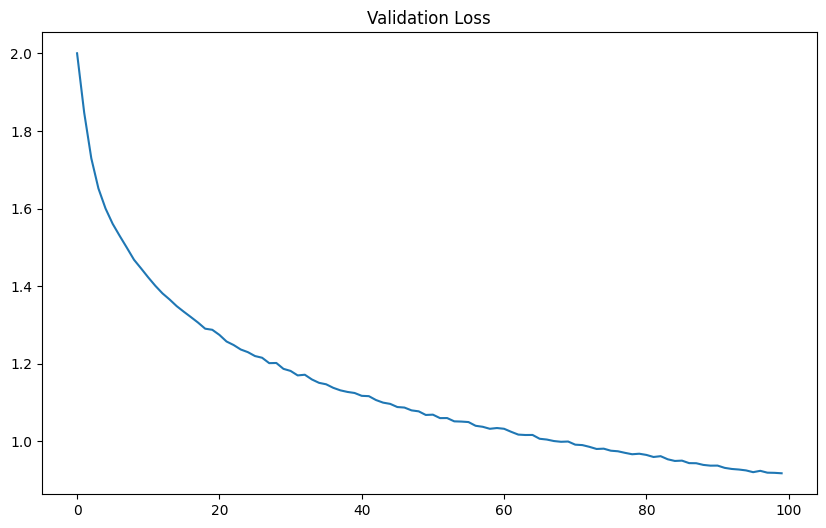

In [10]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
# ['loss', 'accuracy', 'val_loss', 'val_accuracy']
# ax.plot(history.history['val_accuracy'])
ax.plot(history.history['val_loss'])
ax.set_title('Validation Loss')

plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 11ms/step - loss: 0.9191 - accuracy: 0.6754
Test accuracy: 0.6754000186920166


# Check for prediction

In [12]:
prediction = model.predict(test_images)
predicted_classes = np.argmax(prediction, axis=1)
# probability_df = pd.DataFrame(prediction.T,columns=['Probability'])
# probability_df['Probability'] = probability_df['Probability'].round(2)
# probability_df

313/313 [==============================] - 5s 14ms/step


In [13]:
results = pd.DataFrame({'predicted':predicted_classes,'labels':test_labels})
results['comparison'] = results['predicted'] == results['labels']

ValueError: Per-column arrays must each be 1-dimensional

In [34]:
results[results['comparison']==False].tail()

,predicted,labels,comparison
9692,7,9,False
9729,6,5,False
9770,0,5,False
9792,9,4,False
9839,7,2,False


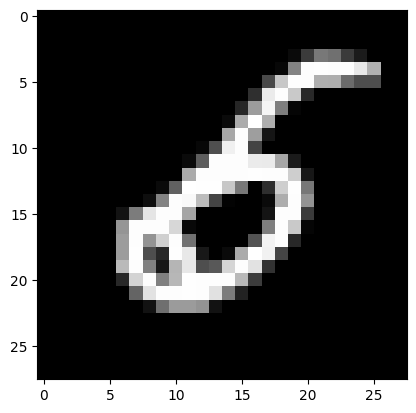

In [41]:
plt.imshow(test_images[9729],cmap='gray')
plt.show()